In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.0.2'

In [2]:
import pandas as pd
import os

base_dir = "../../Data"
base_csv_path = os.path.join(base_dir, 'm0_imputed.csv')
assert os.path.exists(base_csv_path), f"base {base_csv_path} does not exist"

# Load the data
df = pd.read_csv(base_csv_path)

In [3]:
#Calculate the median in wl_time
median = df['wl_time'].median()

#Print the the median wainting time
print("The median waiting time is: ", median)

#Code wl_time to 0 if it is less than the median, otherwise 1
df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < median else 1)

The median waiting time is:  88.0


In [4]:
df.sample(5)

,wgt_kg_tcr,hgt_cm_tcr,most_rcnt_creat,tot_serum_album,hemo_co_tcr,init_age,init_hgt_cm_calc,init_wgt_kg_calc,wl_time,thoracic_dgn_1.0,...,ethcat_2,ethcat_4,ethcat_5,ethcat_6,ventilator_tcr_0,ventilator_tcr_1,work_income_tcr_N,work_income_tcr_U,work_income_tcr_Y,work_income_tcr_missing
59023,70.3070,172.72,0.82,3.8,2.64,27.0,172.72,70.3070,1,0,...,0,0,0,0,1,0,0,0,1,0
48625,77.1110,170.18,2.30,3.8,4.10,58.0,170.18,77.1110,0,1,...,1,0,0,0,1,0,1,0,0,0
13929,95.0000,173.00,1.20,3.8,4.10,58.0,173.00,95.0000,0,1,...,0,0,0,0,1,0,0,0,0,1
42110,61.8000,170.18,0.80,4.2,3.40,66.0,170.18,61.8000,0,1,...,1,0,0,0,1,0,1,0,0,0
53695,45.3592,160.02,1.20,3.8,4.70,20.0,160.02,45.3592,0,0,...,0,0,0,0,1,0,1,0,0,0


In [5]:
# import pycaret classification and init setup
from pycaret.classification import *
#Use setup with missforest imputation

#Create a list of all columns in df that have 2 unique values but without wl_time columns
binary_features = [col for col in df.columns if df[col].nunique() == 2 and col != 'wl_time']

#Create a list of all columns in df that have more than 2
#and less than 10 unique values
multi_features = [col for col in df.columns if df[col].nunique() > 2]

#print num of binary features and multi_featres
print("number of features in df: ", len(df.columns))
print("Number of binary features: ", len(binary_features))
print("Number of multi features: ", len(multi_features))

best = setup(data = df, target = 'wl_time', imputation_type='iterative', normalize=True, numeric_features=multi_features, categorical_features=binary_features)


number of features in df:  100
Number of binary features:  91
Number of multi features:  8


,Description,Value
0,Session id,4568
1,Target,wl_time
2,Target type,Binary
3,Original data shape,"(65067, 100)"
4,Transformed data shape,"(65067, 100)"
5,Transformed train set shape,"(45546, 100)"
6,Transformed test set shape,"(19521, 100)"
7,Ordinal features,91
8,Numeric features,8
9,Categorical features,91


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7034,0.7728,0.7171,0.6992,0.7080,0.4067,0.4069,8.8790
gbc,Gradient Boosting Classifier,0.7022,0.7700,0.7214,0.6959,0.7084,0.4043,0.4046,1.9940
lightgbm,Light Gradient Boosting Machine,0.7019,0.7724,0.7176,0.6970,0.7071,0.4037,0.4039,0.5990
ada,Ada Boost Classifier,0.6981,0.7640,0.7193,0.6912,0.7049,0.3960,0.3964,0.9080
lr,Logistic Regression,0.6978,0.7647,0.7190,0.6911,0.7047,0.3956,0.3960,2.1870
lda,Linear Discriminant Analysis,0.6978,0.7645,0.7230,0.6895,0.7058,0.3954,0.3959,0.7990
ridge,Ridge Classifier,0.6977,0.0000,0.7230,0.6894,0.7058,0.3954,0.3959,0.3120
xgboost,Extreme Gradient Boosting,0.6972,0.7643,0.7099,0.6935,0.7016,0.3943,0.3944,2.5090
rf,Random Forest Classifier,0.6911,0.7534,0.6926,0.6918,0.6922,0.3821,0.3821,1.4540
svm,SVM - Linear Kernel,0.6849,0.0000,0.7086,0.6780,0.6927,0.3697,0.3704,0.5100


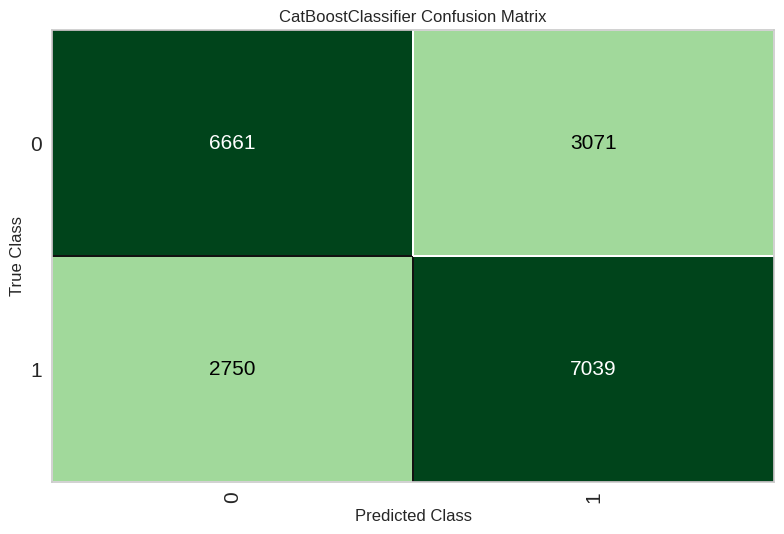

In [7]:
plot_model(best, plot = 'confusion_matrix')

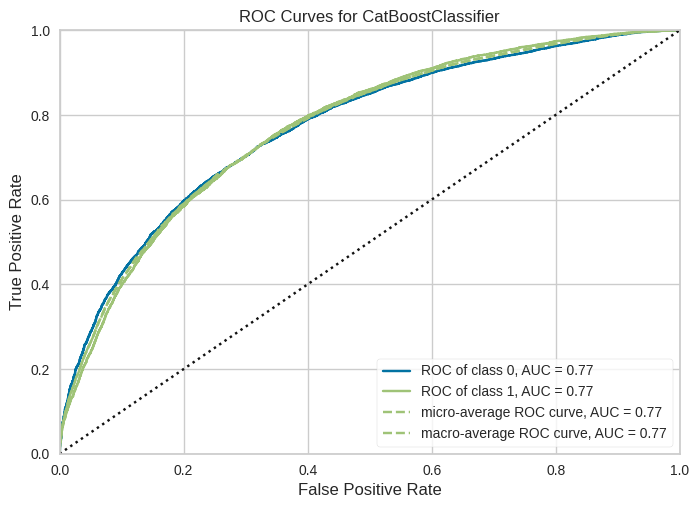

In [8]:
plot_model(best, plot = 'auc')

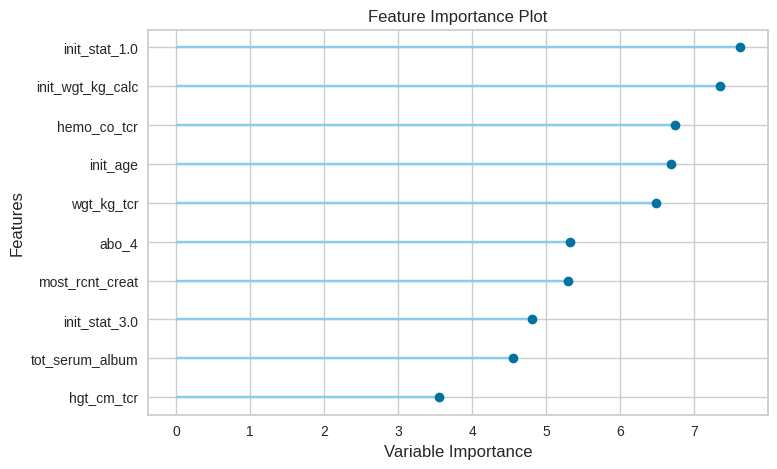

In [9]:
plot_model(best, plot = 'feature')

In [10]:
from pycaret.classification import *

gb = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7104,0.7769,0.7373,0.7008,0.7186,0.4208,0.4213
1,0.7052,0.7703,0.7334,0.6953,0.7138,0.4102,0.4108
2,0.7038,0.7677,0.7211,0.6982,0.7095,0.4076,0.4078
3,0.7063,0.7811,0.7198,0.7020,0.7108,0.4125,0.4126
4,0.7014,0.7732,0.7255,0.6933,0.7090,0.4028,0.4032
5,0.6968,0.7636,0.7182,0.6901,0.7038,0.3935,0.3939
6,0.6965,0.7674,0.7220,0.6882,0.7047,0.3930,0.3934
7,0.7104,0.7766,0.7198,0.7077,0.7137,0.4207,0.4208
8,0.6932,0.7581,0.7010,0.6916,0.6962,0.3864,0.3865


In [11]:
plot_model(gbc, plot = 'feature')

NameError: name 'gbc' is not defined